In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

Examples are taken from here: http://terpconnect.umd.edu/~petersd/666/fixedpoint.pdf

# Test Case 1

Let's start with a function
$$
\begin{align}
x_0 & = 0.1 * (1 - x_1 - np.sin(x_0 + x_1))\\
x_1 & = 0.1 * (2 + x_0 + np.cos(x_0 - x_1))
\end{align}
$$

In [2]:
def g(x):
    xnew = np.zeros_like(x)
    xnew[0] = 0.1 * (1 - x[1] - np.sin(x[0] + x[1]))
    xnew[1] = 0.1 * (2 + x[0] + np.cos(x[0] - x[1]))
    return xnew

In [3]:
x = np.zeros(2)

for i in range(10):
    x = g(x)
    print(x)

[0.1 0.3]
[0.03105817 0.30800666]
[0.0359388  0.29929524]
[0.03717146 0.30014605]
[0.0368897  0.30027925]
[0.0368904  0.30024027]
[0.03689791 0.30024138]
[0.03689698 0.30024229]
[0.03689689 0.30024215]
[0.03689693 0.30024215]


In [4]:
x = np.zeros(2)
q = 0.3

for i in range(10):
    xnew = g(x)
    
    dk = q / (1 - q) * np.linalg.norm(xnew - x, np.inf)
    
    x = xnew
    print(x, dk)

[0.1 0.3] 0.1285714285714286
[0.03105817 0.30800666] 0.029546500384656456
[0.0359388  0.29929524] 0.003733463491232722
[0.03717146 0.30014605] 0.0005282795259423677
[0.0368897  0.30027925] 0.00012075277490288964
[0.0368904  0.30024027] 1.670180745312809e-05
[0.03689791 0.30024138] 3.218057400927534e-06
[0.03689698 0.30024229] 3.9554372175537594e-07
[0.03689689 0.30024215] 6.008818395234325e-08
[0.03689693 0.30024215] 1.5370509763777488e-08


[0.1 0.3] 0.1285714285714286
[0.03105817 0.30800666] 0.029546500384656456
[0.0359388  0.29929524] 0.003733463491232722
[0.03717146 0.30014605] 0.0005282795259423677
[0.0368897  0.30027925] 0.00012075277490288964
[0.0368904  0.30024027] 1.670180745312809e-05
[0.03689791 0.30024138] 3.218057400927534e-06
[0.03689698 0.30024229] 3.9554372175537594e-07
[0.03689689 0.30024215] 6.008818395234325e-08
[0.03689693 0.30024215] 1.5370509763777488e-08


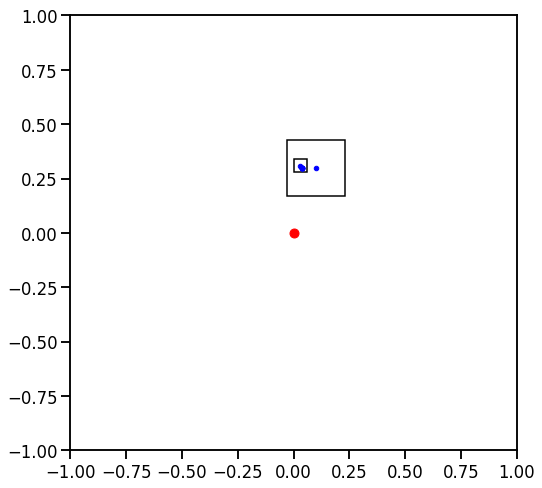

In [5]:
x = np.zeros(2)
q = 0.3

plt.figure(figsize=(8,8))
plt.plot(x[0], x[1], 'ro')
plt.axis([-1,1,-1,1])
dks = []

for i in range(10):
    xnew = g(x)
    
    dk = q / (1 - q) * np.linalg.norm(xnew - x, np.inf)
    dks.append(dk)
    
    x = xnew
    print(x, dk)
    
    # plot
    plt.plot(x[0], x[1], 'b.')
    ax = plt.gca()
    ax.add_patch(Rectangle((x[0]-dk, x[1]-dk), 2*dk, 2*dk, fill=None, alpha=1))

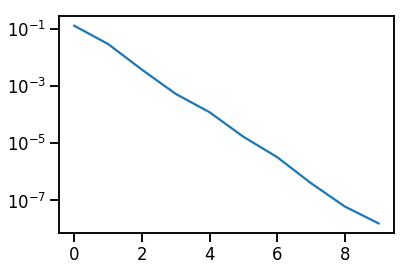

In [6]:
plt.semilogy(dks)

# Test Case 2

For this problem try
$$
\begin{align}
x_0 = (1/3) * (x_0 - x_0*x_1 + 1)\\
x_1 = (1/3) * (x_1 + x_0*x_1**2 + 1)
\end{align}
$$

In [ ]:
def g(x):
    xnew = np.zeros_like(x)
    xnew[0] = (1/3) * (x[0] - x[0]*x[1] + 1)
    xnew[1] = (1/3) * (x[1] + x[0]*x[1]**2 + 1)
    return xnew

In [7]:
x = np.zeros(2)
q = 19 / 27

for i in range(10):
    xnew = g(x)
    
    dk = q / (1 - q) * np.linalg.norm(xnew - x, np.inf)
    
    x = xnew
    print(x, dk)

[0.1 0.3] 0.7125000000000001
[0.03105817 0.30800666] 0.1637368562983045
[0.0359388  0.29929524] 0.020689610180581332
[0.03717146 0.30014605] 0.002927549039597287
[0.0368897  0.30027925] 0.0006691716275868467
[0.0368904  0.30024027] 9.255584963608482e-05
[0.03689791 0.30024138] 1.7833401430140082e-05
[0.03689698 0.30024229] 2.1919714580610414e-06
[0.03689689 0.30024215] 3.329886860692355e-07
[0.03689693 0.30024215] 8.517824160760024e-08


[0.1 0.3] 0.7125000000000001
[0.03105817 0.30800666] 0.1637368562983045
[0.0359388  0.29929524] 0.020689610180581332
[0.03717146 0.30014605] 0.002927549039597287
[0.0368897  0.30027925] 0.0006691716275868467
[0.0368904  0.30024027] 9.255584963608482e-05
[0.03689791 0.30024138] 1.7833401430140082e-05
[0.03689698 0.30024229] 2.1919714580610414e-06
[0.03689689 0.30024215] 3.329886860692355e-07
[0.03689693 0.30024215] 8.517824160760024e-08


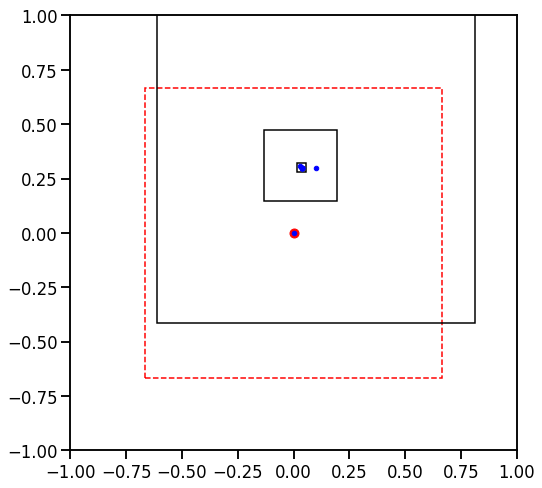

In [8]:
x = np.zeros(2)
q = 19/27

plt.figure(figsize=(8,8))
plt.plot(x[0], x[1], 'ro')
plt.axis([-1,1,-1,1])
plt.plot(x[0], x[1], 'b.')
ax = plt.gca()
ax.add_patch(Rectangle((-2/3,-2/3), 2*2/3, 2*2/3, fill=None, alpha=1,
                       edgecolor='r', linestyle='--'))
    
for i in range(10):
    xnew = g(x)
    
    dk = q / (1 - q) * np.linalg.norm(xnew - x, np.inf)
    
    x = xnew
    print(x, dk)
    
    # plot
    plt.plot(x[0], x[1], 'b.')
    ax = plt.gca()
    ax.add_patch(Rectangle((x[0]-dk, x[1]-dk), 2*dk, 2*dk, fill=None, alpha=1))

In [ ]:
Rectangle?